In [81]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# initialize samples
dataset = pd.read_csv('data_one.csv')
samples = torch.from_numpy(dataset.iloc[:, :-1].to_numpy()).type(torch.float32)
targets = torch.from_numpy(dataset.iloc[:, -1].to_numpy()).type(torch.float32)

targets

tensor([-1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        -1.,  1.,  1., -1., -1.,  1.])

(-0.7849999874830246,
 1.0849999994039536,
 -0.9949999749660492,
 1.094999998807907)

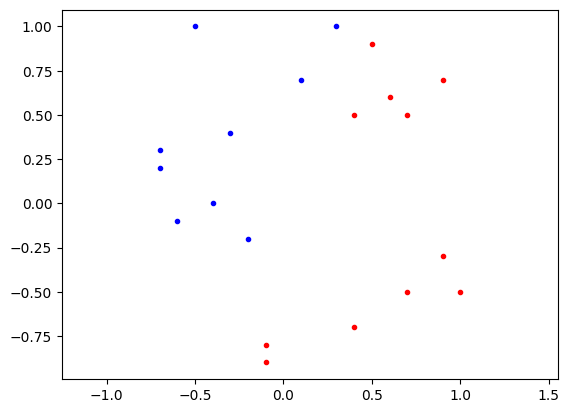

In [83]:
plt.plot(samples[targets==1,0], samples[targets==1, 1], '.r')
plt.plot(samples[targets==-1,0], samples[targets==-1, 1], '.b')
plt.axis('equal')
#plt.show()

In [84]:
# The size of the weights vector is equal to the number of features + 1 (bias)
weight = torch.randn(1, samples.size(1)+1)
# Initialize learning rate 
learning_rate = 0.01

loss = 1

while (loss!=0):
    errors = []
    for i in range(samples.size(0)):
        xi, ti = samples[[i]], targets[i]

        xi = torch.cat((torch.tensor([[-1]]), xi), dim=1)

        # predict
        vector = torch.matmul(weight, xi.T)
        yin= torch.sign(vector)

        # compute error
        error = ti - yin
        
        # update weights
        delta_weight = learning_rate * error * xi 
        weight = weight + delta_weight

        errors.append(error)
    
    """We increase the error calculated in each epoch to the power of two, 
    because if the average of their square becomes zero, it means that
    no weight change has occurred and the training is over."""
    loss = torch.mean(torch.tensor(errors)**2)



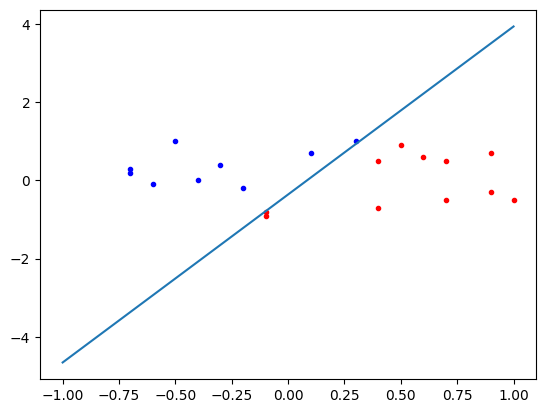

In [85]:
slope = -1*(weight[0, 1])/weight[0, 2]
b = weight[0, 0] / weight[0, 2]

x = torch.linspace(-1,1,50)
y = (slope*x)+b

plt.plot(samples[targets==1,0], samples[targets==1, 1], '.r')
plt.plot(samples[targets==-1,0], samples[targets==-1, 1], '.b')
plt.plot(x, y)
plt.show()
